In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Easy  
Groupon : Describe Hypothesis Type I and Type II errors are, and the trade-offs between them.  
* 1종 오류(Type I error) : 귀무가설($H_0$)이 '참'인데도 기각하여 오류를 범하는 확률($\alpha$ error)  
* 2종 오류(Type II error) : 귀무가설($H_0$)이 '거짓'임에도 채택하는 오류($\beta$ error)
* 1종 오류와 2종 오류의 Trade-off  : 1종 오류 확률이 증가하면 2종 오류 확률은 감소한다

### Medium  
Akuna : Say you have two random variables X and Y, each with a standard deviation.  
What is the variance of aX + bY for constant a and b?  

use  
$E(aX + bY) = aE(X) + bE(Y)$  
$Var(X) = E(X^2) - [E(X)]^2$  
$Cov(X,Y) = E(XY) - E(X)E(Y)$  
cf. X and Y are independent variables, $Cov(X,Y)$ = 0

$$Var(aX + bY) = E[(aX+bY)^2] - (E[aX +bY])^2$$  
$$ = E[a^2X^2 + 2abXY + b^2Y^2] - (aE(X)+bE(Y))^2$$
$$ = (a^2E(X^2) + 2abE(XY) + b^2E(Y^2)) - (a^2[E(X)]^2 + 2abE(X)E(Y) + b^2[E(Y)]^2)$$
$$ = a^2(E(X^2) - [E(X)]^2) + b^2(E(Y^2) - [E(Y)]^2) +2ab(E(XY) - E(X)E(Y))$$
$$ = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$  

$$cf. Var(aX + bY) = a^2Var(X) + b^2Var(Y) \space when \space X,Y \space independent $$



### Hard  
Uber: Say you are given a random Bernoulli trial generator. How would you generate values from a standard normal distribution?  

By Central Limit Theorem, the mean of a sufficiently large sample of Bernoulli trials follows a normal distribution with mean p and standard error $\sqrt{\frac{p(1-p)}{n}}$.

In [2]:
def gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0):
    dt = 1/steps_per_year # 1/250 = 0.004
    n_steps = int(n_years*steps_per_year) # 1*250 = 250
    rets_plus_1 = np.random.normal(loc=(mu*dt + 1), scale=(sigma*np.sqrt(dt)), size=(n_steps, n_stocks)) # 일별 수익률
    rets_plus_1[0] = 1 # 초기값 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod() # 250일 동안 누적 변화율
    return prices

(a) Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price.

In [159]:
n_stocks = 3000
mu = 0.05
sigma = 0.2
steps_per_year = 250
s_0 = 100

<AxesSubplot:>

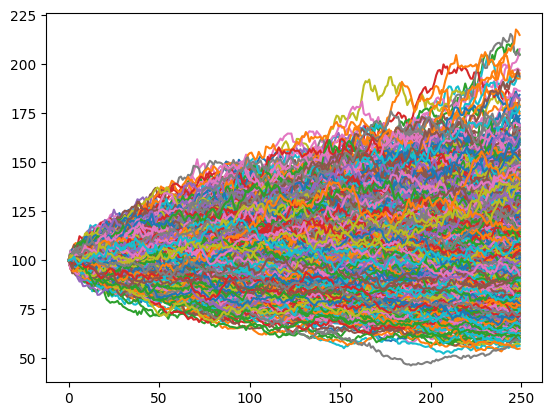

In [160]:
n_years = 1
price_1y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_1y.plot(legend=False)

<AxesSubplot:>

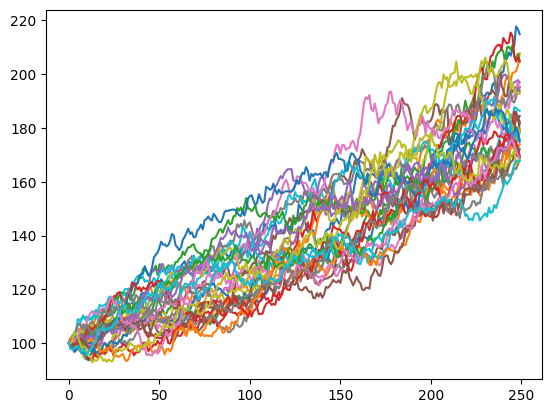

In [161]:
price_1y_30 = price_1y.T.sort_values(249, ascending = False).head(30)
price_1y_30 = price_1y_30.T
price_1y_30.plot(legend=False)

In [162]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr1y = (price_1y.iloc[-1]/price_1y.iloc[0]) - 1
Sharpe1y = cagr1y.mean()/cagr1y.std()
print('Sharpe 3000 stocks(1y) :', round(Sharpe1y,2))
# Calculate the average Sharpe ratio of Top 30 stocks
cagr1y30 = (price_1y_30.iloc[-1] / price_1y_30.iloc[0]) - 1
Sharpe1y30 = cagr1y30.mean()/cagr1y30.std()
print('Sharpe 30 stocks(1y) :', round(Sharpe1y30,2))

Sharpe 3000 stocks(1y) : 0.24
Sharpe 30 stocks(1y) : 6.27


Is it okay to invest money on these 30 stocks? If not, why?
>1. 샤프비율이 높아서 MDD 값도 높을 경우 과적화 일어나 이후 기간에 대해 동일한 결과나 나올 것이라는 보장 없다.
>2. 백테스트 기간이 상대적으로 짧다.
>3. Random 표본을 추출하여 샤프비율을 구하였을 때 5 < Sharpe < 10 범위 까지 나와 안정적인 수익을 기대할 수 없다.

<AxesSubplot:>

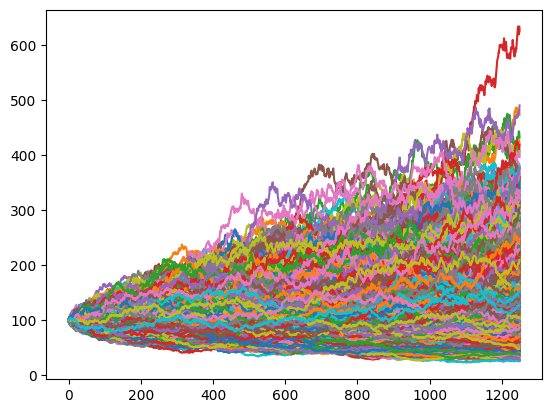

In [163]:
n_years = 5
price_5y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_5y.plot(legend=False)

<AxesSubplot:>

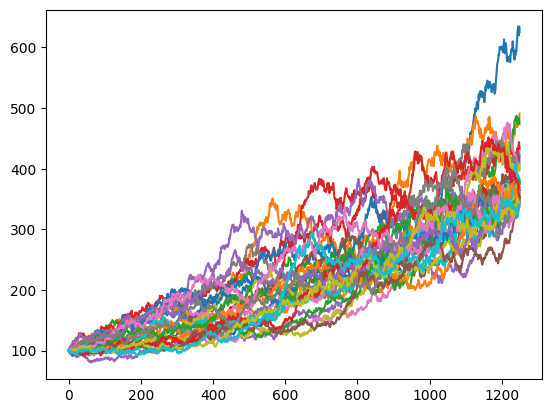

In [164]:
price_5y_30 = price_5y.T.sort_values(1249, ascending = False).head(30)
price_5y_30 = price_5y_30.T
price_5y_30.plot(legend=False)

In [165]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr5y = (price_5y.iloc[-1]/price_5y.iloc[0]) - 1
Sharpe5y = cagr5y.mean()/cagr5y.std()
print('Sharpe 3000 stocks(5y) :', round(Sharpe5y,2))
# Calculate the average Sharpe ratio of Top 30 stocks 
cagr5y30 = (price_5y_30.iloc[-1] /price_5y_30.iloc[0])- 1
Sharpe5y30 = cagr5y30.mean()/cagr5y30.std()
print('Sharpe 30 stocks(5y) :', round(Sharpe5y30,2)) 

Sharpe 3000 stocks(5y) : 0.5
Sharpe 30 stocks(5y) : 4.8


What intuition we can get from these results? Think about the relation with backtesting.
>Random 표본을 추출하여 샤프비율을 구하였을 때 4 < Sharpe < 7 범위 까지 나와 1년 표본을
>사용했을 때 대비 샤프비율의 편차가 적었다.  
>즉 백테스트 했을 때 편차가 적기 때문에 이후 기간에 대해서도 일관성있는 수익률을 기대할 수 >있다.